<h1>Experiment with beerallpos</h1>

In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import os
import sys
basedir = '/home/joewandy/git/metabolomics_tools'
sys.path.append(basedir)

In [17]:
import numpy as np
import pylab as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import display, HTML

import cPickle
import random
import copy
import glob
import gzip

In [18]:
from alignment.models import HyperPars as AlignmentHyperPars
from alignment.experiment import *

<h2>Experiment Parameters</h2>

Set up all the experiment parameters

In [19]:
input_dir = '/home/joewandy/git/metabolomics_tools/alignment/input/beerallpos'
transformation_file = '/home/joewandy/git/metabolomics_tools/alignment/pos_transformations_full.yml'
gt_file = '/home/joewandy/git/metabolomics_tools/alignment/input/beerallpos/ground_truth/beerall.positive.dat'

In [20]:
hp = AlignmentHyperPars()    
hp.within_file_mass_tol = 3
hp.within_file_rt_tol = 10
hp.across_file_mass_tol = 10
hp.across_file_rt_tol = 60
hp.alpha_mass = 1
hp.dp_alpha = 1000.0
hp.beta = 0.1
hp.t = 0.0
hp.mass_clustering_n_iterations = 400
hp.rt_clustering_nsamps = 100
hp.rt_clustering_burnin = 0

print hp

Hyperparameters across_file_mass_tol=10, across_file_rt_tol=60, alpha_mass=1, beta=0.1, dp_alpha=1000.0, mass_clustering_n_iterations=400, matching_alpha=0.3, rt_clustering_burnin=0, rt_clustering_nsamps=100, t=0.0, within_file_mass_tol=3, within_file_rt_tol=10


In [21]:
evaluation_method = 2
n_iter = 1

In [22]:
param_list = []
for mass_tol in range(2, 7, 2):
    for rt_tol in range(5, 31, 5):
        param_list.append((mass_tol, rt_tol))

In [23]:
param_list_mwg = []
for mass_tol in range(2, 7, 2):
    for rt_tol in range(5, 31, 5):
        for group_tol in range(2, 11, 2):
            for alpha in range(0, 11, 2):
                param_list_mwg.append((mass_tol, rt_tol, group_tol, alpha/10.0))

<h2>Create the first-stage clustering for all input files -- Gibbs, mh_biggest=True</h2>

In [24]:
combined_list = load_or_create_clustering('pickles/beerallpos/clustering.p', input_dir, transformation_file, hp)

6733 features read from beerall-file1.csv
6997 features read from beerall-file2.csv
7553 features read from beerall-file3.csv


[Parallel(n_jobs=4)]: Done   1 out of   3 | elapsed:  6.8min remaining: 13.7min
[Parallel(n_jobs=4)]: Done   2 out of   3 | elapsed:  7.1min remaining:  3.5min
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:  7.8min finished


Saved to pickles/beerallpos/clustering.p
Created 6733 clusters
Created 6997 clusters
Created 7553 clusters
Binning with mh_biggest = True
Binning with mh_biggest = True
Binning with mh_biggest = True
Assigning possible transformations 0/6733
Assigning possible transformations 0/6997
Assigning possible transformations 0/7553
Assigning possible transformations 500/6733
Assigning possible transformations 500/6997
Assigning possible transformations 500/7553
Assigning possible transformations 1000/6733
Assigning possible transformations 1000/6997
Assigning possible transformations 1000/7553
Assigning possible transformations 1500/6733
Assigning possible transformations 1500/6997
Assigning possible transformations 1500/7553
Assigning possible transformations 2000/6733
Assigning possible transformations 2000/6997
Assigning possible transformations 2000/7553
Assigning possible transformations 2500/6733
Assigning possible transformations 2500/6997
Assigning possible transformations 2500/7553
As

<h2>Run experiment with beerallpos</h2>

In [25]:
n_files = 3

In [26]:
training_list = load_or_create_filelist('pickles/beerallpos/training_list.p', combined_list, n_iter, n_files)

['beerall-file2.csv', 'beerall-file3.csv', 'beerall-file1.csv']
Saved to pickles/beerallpos/training_list.p


In [27]:
testing_list = load_or_create_filelist('pickles/beerallpos/testing_list.p', combined_list, n_iter, n_files)

['beerall-file2.csv', 'beerall-file3.csv', 'beerall-file1.csv']
Saved to pickles/beerallpos/testing_list.p


In [28]:
exp_results_1a = run_experiment(0, training_list, testing_list, param_list, 'pickles/beerallpos/res_match_feature.p', hp, evaluation_method, transformation_file, gt_file)

Iteration 0
Training on ['beerall-file2.csv', 'beerall-file3.csv', 'beerall-file1.csv']
mass_tol=2, rt_tol=5, tp=186, fp=33, fn=41, prec=0.849, rec=0.819, f1=0.834, th_prob=1.000
mass_tol=2, rt_tol=10, tp=196, fp=35, fn=31, prec=0.848, rec=0.863, f1=0.856, th_prob=1.000
mass_tol=2, rt_tol=15, tp=196, fp=36, fn=31, prec=0.845, rec=0.863, f1=0.854, th_prob=1.000
mass_tol=2, rt_tol=20, tp=197, fp=36, fn=30, prec=0.845, rec=0.868, f1=0.857, th_prob=1.000
mass_tol=2, rt_tol=25, tp=201, fp=38, fn=26, prec=0.841, rec=0.885, f1=0.863, th_prob=1.000
mass_tol=2, rt_tol=30, tp=201, fp=38, fn=26, prec=0.841, rec=0.885, f1=0.863, th_prob=1.000
mass_tol=4, rt_tol=5, tp=187, fp=34, fn=40, prec=0.846, rec=0.824, f1=0.835, th_prob=1.000
mass_tol=4, rt_tol=10, tp=197, fp=36, fn=30, prec=0.845, rec=0.868, f1=0.857, th_prob=1.000
mass_tol=4, rt_tol=15, tp=197, fp=37, fn=30, prec=0.842, rec=0.868, f1=0.855, th_prob=1.000
mass_tol=4, rt_tol=20, tp=198, fp=37, fn=29, prec=0.843, rec=0.872, f1=0.857, th_prob=

In [29]:
exp_results_1b = run_experiment(1, training_list, testing_list, param_list, 'pickles/beerallpos/res_match_cluster.p', hp, evaluation_method, transformation_file, gt_file)

Iteration 0
Training on ['beerall-file2.csv', 'beerall-file3.csv', 'beerall-file1.csv']
mass_tol=2, rt_tol=5, tp=169, fp=30, fn=58, prec=0.849, rec=0.744, f1=0.793, th_prob=1.000
mass_tol=2, rt_tol=10, tp=182, fp=31, fn=45, prec=0.854, rec=0.802, f1=0.827, th_prob=1.000
mass_tol=2, rt_tol=15, tp=182, fp=32, fn=45, prec=0.850, rec=0.802, f1=0.825, th_prob=1.000
mass_tol=2, rt_tol=20, tp=182, fp=33, fn=45, prec=0.847, rec=0.802, f1=0.824, th_prob=1.000
mass_tol=2, rt_tol=25, tp=184, fp=36, fn=43, prec=0.836, rec=0.811, f1=0.823, th_prob=1.000
mass_tol=2, rt_tol=30, tp=184, fp=36, fn=43, prec=0.836, rec=0.811, f1=0.823, th_prob=1.000
mass_tol=4, rt_tol=5, tp=170, fp=31, fn=57, prec=0.846, rec=0.749, f1=0.794, th_prob=1.000
mass_tol=4, rt_tol=10, tp=183, fp=32, fn=44, prec=0.851, rec=0.806, f1=0.828, th_prob=1.000
mass_tol=4, rt_tol=15, tp=183, fp=33, fn=44, prec=0.847, rec=0.806, f1=0.826, th_prob=1.000
mass_tol=4, rt_tol=20, tp=183, fp=34, fn=44, prec=0.843, rec=0.806, f1=0.824, th_prob=

In [30]:
exp_results_1c = run_experiment(3, training_list, testing_list, param_list, 'pickles/beerallpos/res_mwg.p', hp, evaluation_method, transformation_file, gt_file)

Iteration 0
Training on ['beerall-file2.csv', 'beerall-file3.csv', 'beerall-file1.csv']
mass_tol=2, rt_tol=5, tp=184, fp=34, fn=43, prec=0.844, rec=0.811, f1=0.827, th_prob=1.000
mass_tol=2, rt_tol=10, tp=194, fp=37, fn=33, prec=0.840, rec=0.855, f1=0.847, th_prob=1.000
mass_tol=2, rt_tol=15, tp=194, fp=38, fn=33, prec=0.836, rec=0.855, f1=0.845, th_prob=1.000
mass_tol=2, rt_tol=20, tp=195, fp=38, fn=32, prec=0.837, rec=0.859, f1=0.848, th_prob=1.000
mass_tol=2, rt_tol=25, tp=199, fp=40, fn=28, prec=0.833, rec=0.877, f1=0.854, th_prob=1.000
mass_tol=2, rt_tol=30, tp=201, fp=39, fn=26, prec=0.838, rec=0.885, f1=0.861, th_prob=1.000
mass_tol=4, rt_tol=5, tp=185, fp=35, fn=42, prec=0.841, rec=0.815, f1=0.828, th_prob=1.000
mass_tol=4, rt_tol=10, tp=195, fp=38, fn=32, prec=0.837, rec=0.859, f1=0.848, th_prob=1.000
mass_tol=4, rt_tol=15, tp=195, fp=39, fn=32, prec=0.833, rec=0.859, f1=0.846, th_prob=1.000
mass_tol=4, rt_tol=20, tp=196, fp=39, fn=31, prec=0.834, rec=0.863, f1=0.848, th_prob=

<h2>Plotting</h2>

In [31]:
def plot_density(exp_res, title):
    training_dfs = []
    for item in exp_res:
        training_data, training_df, best_training_row, match_res = item
        training_dfs.append(training_df)
    combined = pd.concat(training_dfs, axis=0)
    combined = combined.reset_index(drop=True)
#     f, ax = plt.subplots(figsize=(6, 6))    
#     sns.kdeplot(combined.Rec, combined.Prec, ax=ax)
#     sns.rugplot(combined.Rec, ax=ax)
#     sns.rugplot(combined.Prec, vertical=True, ax=ax)    
#     ax.set_xlim([0.7, 1.0])
#     ax.set_ylim([0.7, 1.0])
    g = sns.JointGrid(x="Rec", y="Prec", data=combined, xlim=(0.7, 1.0), ylim=(0.7, 1.0))
    g = g.plot_joint(sns.kdeplot)
    g = g.plot_marginals(sns.kdeplot, shade=True)
    ax = g.ax_joint
    ax.set_xlabel('Rec')
    ax.set_ylabel('Prec')
    ax = g.ax_marg_x
    ax.set_title(title)    

/home/joewandy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/joewandy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


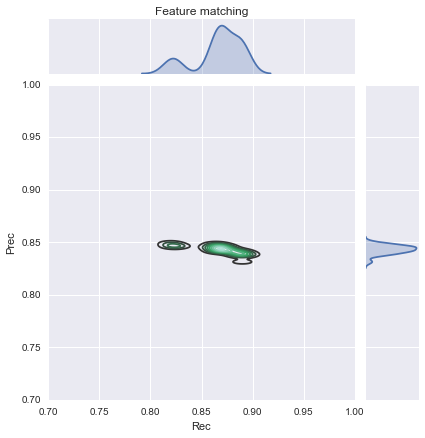

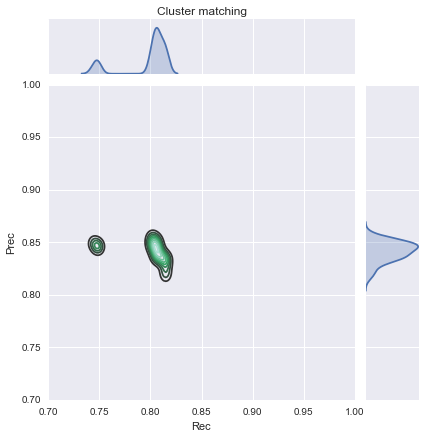

In [32]:
plot_density(exp_results_1a, 'Feature matching')
plot_density(exp_results_1b, 'Cluster matching')